In [ ]:
http://www.goldsborough.me/bits/c++/low-level/problems/2015/10/11/23-52-02-bit_manipulation/

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import time

# Convert interger to binary

Example: 242
 
 - 242 / 2 = 121 -> 0 # Remainder of 0
 - 121 / 2 = 60 -> 1 # Remainder of 1
 - 60 / 2 = 30 -> 0 # Remainder of 0
 - 30 / 2 = 15 -> 0 # Remainder of 0
 - 15 / 2 = 7 -> # Remainder of 1
 - 7 / 2 = 3 -> # Remainder of 1
 - 3 / 2 = 1 -> 1 # Remainder of 1
 - 1 / 2 = 0 -> 1 # Remainder of 1

In [2]:
int('11110010', 2)

242

### Use a stack data structure to convert integer values to binary

In [3]:
def num_to_bin(dec_num):
    stack = []
    
    while dec_num > 0:
        remainder = dec_num % 2
        stack.append(remainder)
        dec_num //= 2
        
    bin_num = ''
    while stack: # While stack is not empty
        bin_num += str(stack.pop())
    return bin_num

In [4]:
num_to_bin(242)

'11110010'

### Showing it is a linear time solution

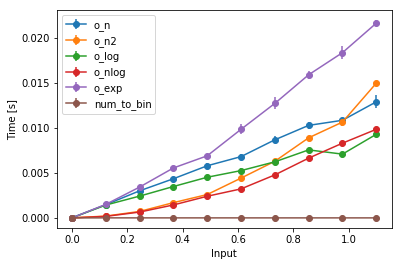

In [5]:
from functools import partial
import timeit
import numpy as np
from matplotlib import pyplot


def plot_time(func, inputs, repeats, n_tests):
    """
    Run timer and plot time complexity of `func` using the iterable `inputs`.

    Run the function `n_tests` times per `repeats`.
    """
    x, y, yerr = [], [], []
    for i in inputs:
        timer = timeit.Timer(partial(func, i))
        t = timer.repeat(repeat=repeats, number=n_tests)
        x.append(i)
        y.append(np.mean(t))
        yerr.append(np.std(t) / np.sqrt(len(t)))
    pyplot.errorbar(x, y, yerr=yerr, fmt='-o', label=func.__name__)


def plot_times(functions, inputs, repeats=3, n_tests=1, file_name=""):
    """
    Run timer and plot time complexity of all `functions`,
    using the iterable `inputs`.

    Run the functions `n_tests` times per `repeats`.

    Adds a legend containing the labels added by `plot_time`.
    """
    for func in functions:
        plot_time(func, inputs, repeats, n_tests)
    pyplot.legend()
    pyplot.xlabel("Input")
    pyplot.ylabel("Time [s]")
    if not file_name:
        pyplot.show()
    else:
        pyplot.savefig(file_name)



import math
import time

scale = 100.

def o_n(n):
    time.sleep(n / scale)

def o_n2(n):
    time.sleep(n**2 / scale)

def o_log(n):
    time.sleep(math.log(n + 1) / scale)

def o_nlog(n):
    time.sleep(n * math.log(n + 1) / scale)

def o_exp(n):
    time.sleep((math.exp(n) - 1) / scale)

def test(n):
    time.sleep(num_to_bin(n) / scale)
    
plot_times([o_n, o_n2, o_log, o_nlog, o_exp, num_to_bin],
           np.linspace(0, 1.1, num=10), repeats=3)

# Bitwise operators python

### ( & ) Binary AND 
Operator copies a bit to the result if it exists in both operands

In [6]:
a = 60            # 60 = 0011 1100 
b = 13            # 13 = 0000 1101 

c = a & b;    # c = 12 = 0000 1100


print("Value of c is ", c)
print(num_to_bin(c), bin(c)) 
# Notice that the leading zeros are ignored in binary representation

Value of c is  12
1100 0b1100


In [7]:
a = 60            # 60 = 0011 1100 
b = 242          # 242 = 1111 0010 

c = a & b;    # c = 12 = 0011 0000 which = 110000 or 0b11000


print("Value of c is ", c)
print(num_to_bin(c), bin(c))

Value of c is  48
110000 0b110000


### ( | ) Binary OR 
It copies a bit if it exists in either operand.

In [8]:
a = 60            # 60 = 0011 1100 
b = 13            # 13 = 0000 1101 

c = a | b     # c = 61 = 0011 1101


print("Value of c is ", c)
print(num_to_bin(c), bin(c))

Value of c is  61
111101 0b111101


In [9]:
a = 60            # 60 = 0011 1100 
b = 242          # 242 = 1111 0010

c = a | b    # c = 254 = 1111 1110


print("Value of c is ", c)
print(num_to_bin(c), bin(c))

Value of c is  254
11111110 0b11111110


### ( ^ ) Binary XOR 
It copies the bit if it is set in one operand but not both.

In [10]:
a = 60            # 60 = 0011 1100 
b = 13            # 13 = 0000 1101 

c = a ^ b         # 49 = 0011 0001


print("Value of c is ", c)
print(num_to_bin(c), bin(c))

Value of c is  49
110001 0b110001


In [11]:
a = 60            # 60 = 0011 1100 
b = 242          # 242 = 1111 0010

c = a ^ b    # c = 206 = 1100 1110


print("Value of c is ", c)
print(num_to_bin(c), bin(c))

Value of c is  206
11001110 0b11001110


In [12]:
num_to_bin(1)

'1'

### ( ~ ) Binary Ones Complement
It is unary and has the effect of 'flipping' bits.

In [13]:
a = 60            # 60 = 0011 1100 

c = ~a;          # -61 = 1100 0011


print("Value of c is ", c)

print(num_to_bin(c), bin(c))
print('''\nNotice the above functions do not work for 
converting negative numbers to binary form''')

Value of c is  -61
 -0b111101

Notice the above functions do not work for 
converting negative numbers to binary form


In [14]:
b = 13            # 13 = 0000 1101 

c = ~b;          # -14 = 1111 0010

print("Value of c is ", c)

Value of c is  -14


### ( << ) Binary Left shift

 - The left operands value is moved left by the number of bits specified by the right operand.
 - Also equivalent to multiplying by 2 __**__ (number shifted)

In [15]:
a = 60            # 60 = 0011 1100 

c = a << 2       # 240 = 1111 0000

print(a*(2**2))

print("Value of c is ", c)
print(num_to_bin(c), bin(c))


240
Value of c is  240
11110000 0b11110000


In [16]:
b = 13            # 13 = 0000 1101 

c = b << 2        # 52 = 0011 0100

print(b*(2**2))

print("Value of c is ", c)
print(num_to_bin(c), bin(c))


52
Value of c is  52
110100 0b110100


### ( >> ) Binary Right shift

 - The left operands value is moved right by the number of bits specified by the right operand.
 - Also equivalent to dividing by 2 __**__ (number shifted) (floor)

In [17]:
a = 60            # 60 = 0011 1100 

c = a >> 2        # 15 = 0000 1111

print(a // (2**2)) # // is the floor operator (round down)

print("Value of c is ", c)
print(num_to_bin(c), bin(c))


15
Value of c is  15
1111 0b1111


In [18]:
b = 13            # 13 = 0000 1101 

c = b >> 2         # 3 = 0000 0011

print(b // (2**2)) # // is the floor operator (round down)

print("Value of c is ", c)
print(num_to_bin(c), bin(c))


3
Value of c is  3
11 0b11


# Two's complement
Typically a negative integer is stored in __Two's complement__ form.
 - This means that the very first bit is used to represent the sign
     - 0 => positive
     - 1 => negative
 - To go from 18 to -18 you need to change the first bit to 1, and fill in the rest with the two's complement
 
- To go from 18 to -18, change the first bit to 1, and with the remaining bits:
    - take the inverse and add 1

- Left shift = multipply by two
- right shift = divide by two

Logical vs arithmetic right shift
 - What happens when we do a right shift for a negatve number
 - Logical right shift fills in a zero
 - arithmetic right shift fills in with original sign bit (it rounds to integers)

masks
 
 - 0 & 0 => 0
 - 0 & 1 => 0
 - 1 & 1 => 1
 
 - 0 | 0 => 0
 - 0 | 1 => 1
 - 1 | 1 => 1
 
 - 0 ^ 0 => 0
 - 0 ^ 1 => 1
 - 1 ^ 1 => 0
 

# Calculate number of bits 

The #bits = #1s

In [19]:
def count_bits(x: int) -> int:
    num_bits = 0
    while x:
        num_bits += x & 1
        x >>= 1
    return num_bits

In [20]:
count_bits(5)

2

# Calculate Parity

The parity of a binary number is 1 if the number of 1s in the binary form of the number is odd.

Solution: The brute-force algorithm iteratively tests the value of each bit while tracking the number of 1s seen so far. Since we only care if the number of 1s is even or odd, we can store the number mod 2

#### Brute-force solution

In [21]:
def parity(x: int) -> int:
    '''Time complexity O(n), brute-fore algorithm'''
    result = 0
    while x:
        result^= x & 1
       
        x >>= 1 # 1 Right shift, which is equivalent to dividing by 2
     
    return result

print(parity(121))

1


In [22]:
def parity_explained(x: int) -> int:
    '''Time complexity O(n), brute-fore algorithm, printing output'''
    result = 0
    while x:
        print(x, 'next iteration')
        print('-------------------\n')
        print(str(num_to_bin(result)).zfill(8) + '   ({}, {})'.format(str(result), 'result'))
        print(str(num_to_bin(x)).zfill(8) + '   ({}, {})'.format(str(x), 'x'))
        print('^_______')
        result = result ^ x 
        print(str(num_to_bin(result)).zfill(8) + '   ({}, {})'.format(str(result), 'result'))
        print('\n')
        
        print(str(num_to_bin(result)).zfill(8) + '   ({}, {})'.format(str(result), 'result'))
        print(str(num_to_bin(1)).zfill(8) + '   ({}, {})'.format(str(1), '1'))
        print('&_______')
        result = result & 1
        print(str(num_to_bin(result)).zfill(8) + '   ({}, {})'.format(str(result), 'result'))
        print('\n')
        
        print(str(num_to_bin(x)).zfill(8) + '   ({}, {})'.format(str(x), 'x'))
        print('>>______')
        x >>= 1 # 1 Right shift, which is equivalent to dividing by 2
        print(str(num_to_bin(x)).zfill(8) + '   ({}, {})'.format(str(x), 'x'))
        print('\n')
    return result

print(parity_explained(121))

121 next iteration
-------------------

00000000   (0, result)
01111001   (121, x)
^_______
01111001   (121, result)


01111001   (121, result)
00000001   (1, 1)
&_______
00000001   (1, result)


01111001   (121, x)
>>______
00111100   (60, x)


60 next iteration
-------------------

00000001   (1, result)
00111100   (60, x)
^_______
00111101   (61, result)


00111101   (61, result)
00000001   (1, 1)
&_______
00000001   (1, result)


00111100   (60, x)
>>______
00011110   (30, x)


30 next iteration
-------------------

00000001   (1, result)
00011110   (30, x)
^_______
00011111   (31, result)


00011111   (31, result)
00000001   (1, 1)
&_______
00000001   (1, result)


00011110   (30, x)
>>______
00001111   (15, x)


15 next iteration
-------------------

00000001   (1, result)
00001111   (15, x)
^_______
00001110   (14, result)


00001110   (14, result)
00000001   (1, 1)
&_______
00000000   (0, result)


00001111   (15, x)
>>______
00000111   (7, x)


7 next iteration
---------------

#### Improved Time-Complexity solution
The first solution is based on erasing the lowest set bit in a word in a single operation, hereby improving best- and average-cases



In [23]:
a = 200
b = 199

c = a&b

print(str(num_to_bin(a)).zfill(8) + '   ({})'.format(a))
print(str(num_to_bin(b)).zfill(8) + '   ({})'.format(b))
print('&_______')
print(str(num_to_bin(c)).zfill(8) + "   ({})".format(c))

11001000   (200)
11000111   (199)
&_______
11000000   (192)


Here is a great trick you should commit to memory: __x&(x-1)__ equals x with its lowest set bit erased. For example, if  x = (00101100) then x-1 = 00101011, so therefore __x&(x-1)__ = 00101000

This can be used to reduce the time complexity. Let k be the number of bits set to 1 in a particular word (word=binary number). For example, for 10001010, k=3. The time complexity for the algorithm below is O(k)

In [24]:
def parity(x: int) -> int:
    '''Time complexity O(k)'''
    result = 0
    while x:
        result ^= 1
        x &= x-1 # drops the lowest set bit of x
    return result

In [25]:
parity(121)

1

# O(log n) solution

In [26]:
def parity(x: int) -> int:
    '''O(log n) solution'''
    x ^= x >> 32
    x ^= x >> 16
    x ^= x >> 8
    x ^= x >> 4
    x ^= x >> 2
    x ^= x >> 1
    return x & 0x1

In [27]:
parity(1)

1

In [28]:
x = 5

x&1 #used to test if bit 0 of x is 1 or 0

1

Bitwise operations in programming languages play a fundamental role when dealing with a lot of applications. Almost all low-level computing must be done using this kind of operations.

https://www.youtube.com/watch?v=-HADQ0-id_I

AND

1100
1010

1000

OR

1100
1010
1110

Exclusive OR
11000
1010
0110

NOT
1010
0101

Shift left
fall off and replaced by 0

Circlular left
fall off and replaced on other side by same number
https://www.geeksforgeeks.org/bitwise-algorithms/
https://www.youtube.com/watch?v=NLKQEOgBAnw

# Find the element that appears once

Input: arr[] = {12, 1, 12, 3, 12, 1, 1, 2, 3, 3}
Output: 2
In the given array all element appear three times except 2 which appears once.

Input: arr[] = {10, 20, 10, 30, 10, 30, 30}
Output: 20
In the given array all element appear three times except 20 which appears once.

In [29]:
def getSingle(arr): 
    ones = 0
    twos = 0
      
    for i in range(len(arr)): 
        # one & arr[i]" gives the bits that 
        # are there in both 'ones' and new 
        # element from arr[]. We add these 
        # bits to 'twos' using bitwise OR 
        twos = twos | (ones & arr[i]) 
        print((ones & arr[i]), twos)

        # one & arr[i]" gives the bits that 
        # are there in both 'ones' and new 
        # element from arr[]. We add these 
        # bits to 'twos' using bitwise OR 
        ones = ones ^ arr[i] 
          
        # The common bits are those bits  
        # which appear third time. So these 
        # bits should not be there in both  
        # 'ones' and 'twos'. common_bit_mask 
        # contains all these bits as 0, so 
        # that the bits can be removed from 
        # 'ones' and 'twos' 
        common_bit_mask = ~(ones & twos) 
          
        # Remove common bits (the bits that  
        # appear third time) from 'ones' 
        ones &= common_bit_mask 
          
        # Remove common bits (the bits that 
        # appear third time) from 'twos' 
        twos &= common_bit_mask 
    return ones 

# driver code 
arr = [3, 3, 2, 3] 
print("The element with single occurrence is ", 
        getSingle(arr)) 

0 0
3 3
0 3
0 1
The element with single occurrence is  2


# Reminder: Two quick shortcuts

#### __x&(x-1)__ => removes the lowest set bit (aka least significant bit) in __x__
 - What is a set bit? => 1. For example in '1000 0001', the first and last positions are set bits
     - In this case, the lowest set bit is the 1 in the last position!

In [30]:
a = 200 

c = a & (a-1) # This operation should remove the lowest set bit from a

print(num_to_bin(a).zfill(8) + '   ({})'.format(a))
print(num_to_bin(a-1).zfill(8) + '   ({})'.format(a-1))
print('&_______________')
print(num_to_bin(c).zfill(8) + '   ({})'.format(c))

11001000   (200)
11000111   (199)
&_______________
11000000   (192)


#### __x&~(x-1)__ => extracts the lowest set bit



In [31]:
a = 200

c = a &~ (a-1) # This operation should extract the lowest set bit from a

print(num_to_bin(a) + '   ({})'.format(a))
print(num_to_bin(b) + '   ({})'.format(b))
print('&_______________')
print(num_to_bin(c).zfill(8) + '   ({})'.format(c))

11001000   (200)
11000111   (199)
&_______________
00001000   (8)


#### Shifting i, and performing & 1 finds the position of the ith bit

In [53]:
bin(39)

for i in range(8):
    print(bin((39 >> i) & 1))

0b1
0b1
0b1
0b0
0b0
0b1
0b0
0b0


# Swap Bits

### Implement code that takes as input a 64 bit integer and swaps the bit indices at i and j

#### First, a quick function that helps find if the ith bit is 1 or 0

In [32]:
def find_ith_bit(x,i):
    return (x >> i)&1

In [33]:
print(num_to_bin(10).zfill(8) + '\n')
for i in range(8)[::-1]:   # [::-1] reverses the output of the for loop
    print(find_ith_bit(10, i))

00001010

0
0
0
0
1
0
1
0


#### On to swapping bits
The time complexity of the function below is O(1)

In [34]:
def swap_bits(x, i, j):
    # i = 7, j = 3
    # Extract the ith and jth bits and see if they differ
    if (x >> i)&1 != (x >> j)&1: # The x>>i&1 finds what the ith bit is set as
        # ith and jth bits differ. We will swap them by . flipping their values
        # Select the bits to flip with bit_mask. Since x^1 = 0 when x = 1 and 
        # x^1 = 1 when x = 0, w e can perform the flip XOR
        
        # creates a mask at the i and j positions. i.e. if i=8 and j = 0,
        # then the mask become 1000 0001. This way the XOR operation is 
        # only performed at those positions where there are 1s
        bit_mask = (1 << i) | (1 << j) 
        x ^= bit_mask
    return x

In [35]:
num_to_bin(242)

'11110010'

In [36]:
num_to_bin(swap_bits(242, 0,5))

'11010011'

# Reverse bits

Write a program that takes a 64-bit unsigned integer and returns the 64-bit unsigned integer consisting of the bits of the input in reverse order. For example, if the input is 1110000000000001 the output should be 1000000000000111

hint: use a lookup table.

In [37]:
def reverse_bits(num):
    length = len(bin(num))+1
    result = 0
    while num:
        # You can test the i'th bit of a number by using a shift and mask.
        result = (result << 1) + (num & 1)
        num >>= 1
    result <<= len(bin(num))
    return result 

In [38]:
def reverse_bits2(num):
    i = 0
    j = len(bin(num))
    
    while i < j:
        if (num >> i)&1 != num>>j&1:
            mask = (1<<i) | (1<<j)
            num^=mask
        i += 1
        j -= 1
    return num

# Finding closest integer with the same weight

Define the weight of a nonnegative integer x to be the number of bits that are set to 1 in its binary representation, i.e. since 92 in base-2 equals (1011100) the weight of 92 is 4.

Write a program which takes as input a nonnegative integer x and returns a number y which is not equal to x, but has the same weight as x and their difference, |y-x| is as small as possible. You can assume x is not 0, or all 1s. For example, if x = 6, you should return 5. You can assume the integer fits in 64 bits.

(Hint: start with the least significant bit)

In [59]:
def closest_int_same_bit_count(x: int) -> int:
    print(bin(x))
    num_unsigned_bits = 64
    for i in range(num_unsigned_bits - 1):
        if (x >> i) & 1 != (x >> (i + 1)) & 1:
            x ^= (1 << i) | (1 << (i+1)) # swaps bits i and (i+1)
            print(bin(x))
            return x
    raise ValueError('All bits are 0 or 1')

In [60]:
closest_int_same_bit_count(39)

0b100111
0b101011


43

#### Solve the same problem in O(1) time and space